# Лабораторная работа "Линейные модели, SVM и деревья решений"
## Цель работы

Изучение линейных моделей, SVM и деревьев решений.

## Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
1. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
1. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
1. Обучите 1) одну из линейных моделей, 2) SVM и 3) дерево решений. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
1. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
1. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

## Выбор датасета

Выбранный датасет: [Glass Classification
](https://www.kaggle.com/uciml/glass)

Атрибуты означают следующее:

1. Id number: 1 to 214 (removed from CSV file)
1. RI: refractive index
1. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
1. Mg: Magnesium
1. Al: Aluminum
1. Si: Silicon
1. K: Potassium
1. Ca: Calcium
1. Ba: Barium
1. Fe: Iron
1. Type of glass: (class attribute) 
   - 1 building_windows_float_processed 
   - 2 building_windows_non_float_processed
   - 3 vehicle_windows_float_processed 
   - 4 vehicle_windows_non_float_processed (none in this database)
   - 5 containers 
   - 6 tableware 
   - 7 headlamps
   
## Загрузка датасета


In [1]:
# Подключение Google диска для загрузки датасета
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%load_ext tensorboard.notebook

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## Проверка и удаление пропусков

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
os.listdir()
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/ММО/lab5/glass.csv',
                   sep=",")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data.shape

(214, 10)

Пропуски в данных не обнаружено. Продолжим изучение датасета.

## train_test_split

In [0]:
from sklearn.model_selection import train_test_split
glassType = data["Type"]
data3 = data.drop(["Type"], axis=1)
# for col in data3.columns:
#  dt = str(data[col].dtype)
#  if not (dt=='float64' or dt=='int64'):
#    data3 = data3.drop([col], axis=1)
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data3, glassType, test_size=0.2, random_state=1)

## Обучение

Обучите 1) одну из линейных моделей, 2) SVM и 3) дерево решений. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [0]:
template = "Значение на тренируемой выборке: {:.2%} \
значение на тестовой выборке: {:.2%}"

In [0]:
class Classifier():
  def __init__(self, method, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.target_1 = []
    self.target_2 = []
    
  def training(self):
    self._method.fit(self.x_train, self.y_train)
    self.target_1 = self._method.predict(self.x_train)
    self.target_2 = self._method.predict(self.x_test)
    
  def result(self, metric):
    print(template.format(metric(self.y_train, self.target_1), 
                      metric(self.y_test, self.target_2)))

## Линейные модели

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score

In [12]:
linear = Classifier(SGDClassifier(), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
linear.training()
linear.result(accuracy_score)

Значение на тренируемой выборке: 47.37% значение на тестовой выборке: 32.56%


In [13]:
linear.result(balanced_accuracy_score)

Значение на тренируемой выборке: 29.85% значение на тестовой выборке: 30.56%


In [14]:
linear.result(cohen_kappa_score)

Значение на тренируемой выборке: 19.49% значение на тестовой выборке: 10.09%


## SVM

In [15]:
svm = Classifier(LinearSVC(C=1.0), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
svm.training()
svm.result(accuracy_score)

Значение на тренируемой выборке: 17.54% значение на тестовой выборке: 23.26%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
svm.result(balanced_accuracy_score)

Значение на тренируемой выборке: 32.19% значение на тестовой выборке: 33.33%


In [17]:
svm.result(cohen_kappa_score)

Значение на тренируемой выборке: 11.10% значение на тестовой выборке: 11.37%


## Дерево решений

In [18]:
tree = Classifier(DecisionTreeClassifier(random_state=1), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
tree.training()
tree.result(accuracy_score)

Значение на тренируемой выборке: 100.00% значение на тестовой выборке: 74.42%


In [19]:
tree.result(balanced_accuracy_score)

Значение на тренируемой выборке: 100.00% значение на тестовой выборке: 84.50%


In [20]:
tree.result(cohen_kappa_score)

Значение на тренируемой выборке: 100.00% значение на тестовой выборке: 64.30%


Видно, что из-за большого числа столбцов лучшим способом становится дерево решений при стандартных гиперпараметрах.

## Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации
### Линейные модели

In [21]:
n_range = np.array(range(5,95,10))
n_range = n_range / 100
tuned_parameters = [{'l1_ratio': n_range}]
tuned_parameters

[{'l1_ratio': array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85])}]

In [22]:
from sklearn.model_selection import GridSearchCV

cl_lin_gs = GridSearchCV(SGDClassifier(), tuned_parameters, cv=5,
                      scoring='accuracy')
cl_lin_gs.fit(data_X_train, data_y_train)
cl_lin_gs.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'l1_ratio': 0.65}

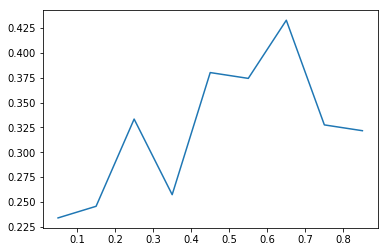

In [23]:
plt.plot(n_range, cl_lin_gs.cv_results_['mean_test_score'])

### SVM

In [24]:
n_range = np.array(range(1,5,1))
tuned_parameters = [{'C': n_range}]
tuned_parameters

[{'C': array([1, 2, 3, 4])}]

In [25]:
cl_svm_gs = GridSearchCV(LinearSVC(), tuned_parameters, cv=3,
                      scoring='accuracy')
cl_svm_gs.fit(data_X_train, data_y_train)
cl_svm_gs.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'C': 3}

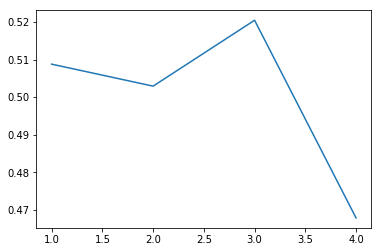

In [26]:
plt.plot(n_range, cl_svm_gs.cv_results_['mean_test_score'])

### Дерево решений

In [27]:
n_range = np.array(range(3,15,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}]

In [28]:
cl_tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=1), tuned_parameters,
                          cv=5, scoring='accuracy')
cl_tree_gs.fit(data_X_train, data_y_train)
cl_tree_gs.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 8}

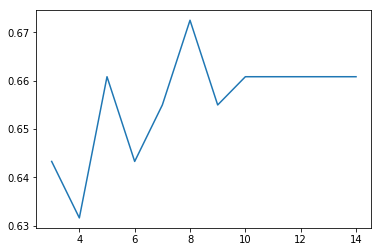

In [29]:
plt.plot(n_range, cl_tree_gs.cv_results_['mean_test_score'])

### Сравнение модели с произвольным и лучшим параметром K

In [30]:
linear2 = Classifier(SGDClassifier(l1_ratio=0.45), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
linear2.training()
linear2.result(accuracy_score)

Значение на тренируемой выборке: 39.18% значение на тестовой выборке: 48.84%


In [31]:
linear.result(accuracy_score)

Значение на тренируемой выборке: 47.37% значение на тестовой выборке: 32.56%


In [32]:
svm2 = Classifier(LinearSVC(C=3.0), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
svm2.training()
svm2.result(accuracy_score)

Значение на тренируемой выборке: 56.14% значение на тестовой выборке: 44.19%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
svm.result(accuracy_score)

Значение на тренируемой выборке: 17.54% значение на тестовой выборке: 23.26%


In [34]:
tree2 = Classifier(DecisionTreeClassifier(random_state=1, max_depth=12), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
tree2.training()
tree2.result(accuracy_score)

Значение на тренируемой выборке: 100.00% значение на тестовой выборке: 74.42%


In [35]:
tree.result(accuracy_score)

Значение на тренируемой выборке: 100.00% значение на тестовой выборке: 74.42%


Качество улучшилось у SGD и LinearSVC. Дерево не улучшило своей точности.